# introduction 

- We will ask some important questions about database to know what is the factors affect on patient's showing up or not

---

# Questions 

### Is Show up affected by Gender ?
### There is a relation between people that have scholarship and people which show up ? 
### There is a relation between people that recevie SMS and people which show up ?
### How is age affecting the patient's absence ?
### After this questions we will know what is the factors predict if a patient will show up or not 

In [91]:
#import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [92]:
# functions 
def piechart (x,y,z,n):
    plt.pie(x, labels = [y, z], autopct='%1.3f%%', );
    plt.title(n);

In [93]:
#load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#view head of data
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


# Clean Data

In [94]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
#check for null
df.isnull().sum().sum()
#after check >> no null data
#data is clean

0

In [96]:
#check for row
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [97]:
# we found a age with -1 so we will clean it
df.drop(labels=99832,axis=0,inplace=True)

In [98]:
#check for row again
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


----

# Is Show up affected by Gender ?

In [99]:
#number of males and females

groupby_male_female = df.groupby('Gender').count()
groupby_male_female_age = groupby_male_female['PatientId'].to_numpy()
no_males_females = groupby_male_female_age[0],groupby_male_female_age[1]

print('No. of Females is {} and No. of Males is {}'.format(no_males_females[0],no_males_females[1]))


No. of Females is 71839 and No. of Males is 38687


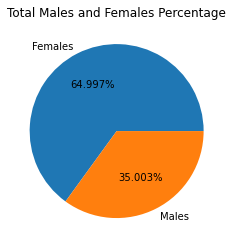

In [100]:
#visualize number of males and females in percentage

piechart(no_males_females,'Females','Males','Total Males and Females Percentage')


In [101]:
total_people = no_males_females[0] + no_males_females[1]

print('Total males and females is {}'.format(total_people));

Total males and females is 110526


In [102]:
# How many of males and females are show up 
male_female_showup = df.groupby(['Gender','No-show']).count()
male_female_showup

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           57245          57245         57245           57245  57245   
       Yes          14594          14594         14594           14594  14594   
M      No           30962          30962         30962           30962  30962   
       Yes           7725           7725          7725            7725   7725   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      No               57245        57245         57245     57245   
       Yes              14594        14594         14594     14594   
M      No               30962        30962         30962     30962   
       Yes               7725         7725          7725      7725   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      No            57245    57245         57245  
       Yes           14594    14594         14594  
M      No            30962    30962         30962  
       Yes            7725     7725          7725

In [103]:
male_female_showup_array = male_female_showup['PatientId'].to_numpy()
male_female_showup_array

array([57245, 14594, 30962,  7725], dtype=int64)

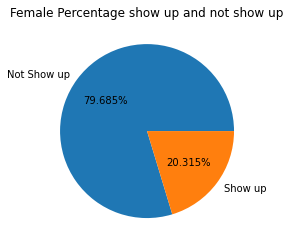

In [104]:
piechart([male_female_showup_array[0],male_female_showup_array[1]],'Not Show up','Show up','Female Percentage show up and not show up') 

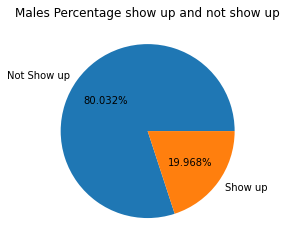

In [105]:
piechart([male_female_showup_array[2],male_female_showup_array[3]],'Not Show up','Show up','Males Percentage show up and not show up')

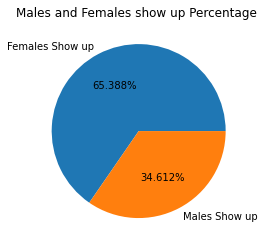

In [106]:
piechart([male_female_showup_array[1],male_female_showup_array[3]],'Females Show up','Males Show up','Males and Females show up Percentage ')

# Answer

##### We see that the gender not affect on show up percentage
##### we show that the number of Females is more than Males
##### but the percentage of every gender in show up same so there is no difference and show up percentage not affected by gender

----

# There is a relation between people that have scholarship and people which show up ?

In [107]:
groupby_scholarship_showup = df.groupby(['Scholarship','No-show']).count()
groupby_scholarship_showup

PatientId  AppointmentID  Gender  ScheduledDay  \
Scholarship No-show                                                   
0           No           79924          79924   79924         79924   
            Yes          19741          19741   19741         19741   
1           No            8283           8283    8283          8283   
            Yes           2578           2578    2578          2578   

                     AppointmentDay    Age  Neighbourhood  Hipertension  \
Scholarship No-show                                                       
0           No                79924  79924          79924         79924   
            Yes               19741  19741          19741         19741   
1           No                 8283   8283           8283          8283   
            Yes                2578   2578           2578          2578   

                     Diabetes  Alcoholism  Handcap  SMS_received  
Scholarship No-show                                               
0           No          79924       79924    79924         79924  
            Yes         19741       19741    19741         19741  
1           No           8283        8283     8283          8283  
            Yes          2578        2578     2578          2578

In [108]:
groupby_scholarship_showup_array = groupby_scholarship_showup['PatientId'].to_numpy()
groupby_scholarship_showup_array


array([79924, 19741,  8283,  2578], dtype=int64)

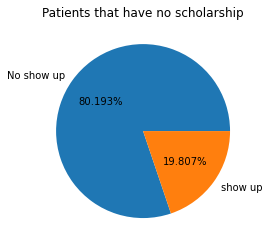

In [109]:
piechart([groupby_scholarship_showup_array[0],groupby_scholarship_showup_array[1]],'No show up','show up','Patients that have no scholarship')

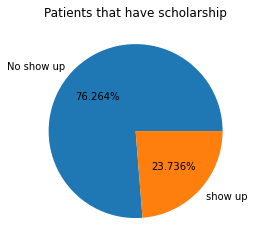

In [110]:
piechart([groupby_scholarship_showup_array[2],groupby_scholarship_showup_array[3]],'No show up','show up','Patients that have scholarship')

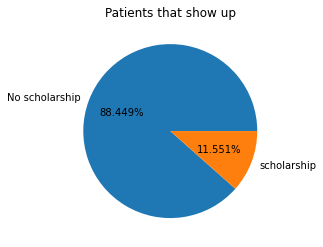

In [111]:
piechart([groupby_scholarship_showup_array[1],groupby_scholarship_showup_array[3]],'No scholarship','scholarship','Patients that show up')

# Answer

##### we found that 88.5% of people which show up has no scholarship
##### and just only 11.5% of people has scholarship 
##### so we conclude that most paitents which show up has no scholarship and that make us concert our work on scholarship people because
##### response rate are more than non scholarship people

---

## There is a relation between people that recevie SMS and people which show up ?

In [112]:
groupby_SMS_showup = df.groupby(['SMS_received','No-show']).count()
groupby_SMS_showup

PatientId  AppointmentID  Gender  ScheduledDay  \
SMS_received No-show                                                   
0            No           62509          62509   62509         62509   
             Yes          12535          12535   12535         12535   
1            No           25698          25698   25698         25698   
             Yes           9784           9784    9784          9784   

                      AppointmentDay    Age  Neighbourhood  Scholarship  \
SMS_received No-show                                                      
0            No                62509  62509          62509        62509   
             Yes               12535  12535          12535        12535   
1            No                25698  25698          25698        25698   
             Yes                9784   9784           9784         9784   

                      Hipertension  Diabetes  Alcoholism  Handcap  
SMS_received No-show                                               
0            No              62509     62509       62509    62509  
             Yes             12535     12535       12535    12535  
1            No              25698     25698       25698    25698  
             Yes              9784      9784        9784     9784

In [113]:
groupby_SMS_showup_array = groupby_SMS_showup['PatientId'].to_numpy()
groupby_SMS_showup_array

array([62509, 12535, 25698,  9784], dtype=int64)

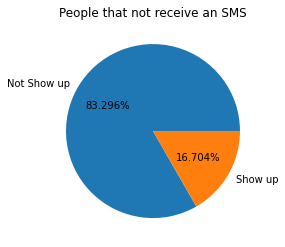

In [114]:
piechart([groupby_SMS_showup_array[0],groupby_SMS_showup_array[1]],'Not Show up','Show up','People that not receive an SMS')

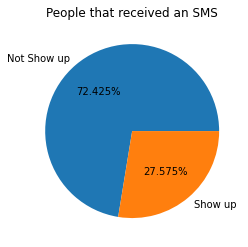

In [115]:
piechart([groupby_SMS_showup_array[2],groupby_SMS_showup_array[3]],'Not Show up','Show up','People that received an SMS')

# Answer

##### We found that people which we send to them SMS respose with 27.5% compared by 16.7% for people not recevied any SMS 
##### So we can see a good relation between show up and SMS's so we should send more SMS's to all our patients to increase show up rate

---

## How is age affecting the patient's absence?

In [116]:
# get all people said yes and no in No-show coulumn
ages = {}
for patientRecord in df.values:
    patientAge = patientRecord[5]
    patientVote = patientRecord[13]
    yesNoRecordsOfPatient = ages.get(patientAge, [0,0])
    if patientVote != 'Yes':
        yesNoRecordsOfPatient[0]+=1
    else:
        yesNoRecordsOfPatient[1]+=1
    ages[patientAge] = yesNoRecordsOfPatient

# group_by_location = df.groupby(['Age','No-show']).count()
# group_by_location

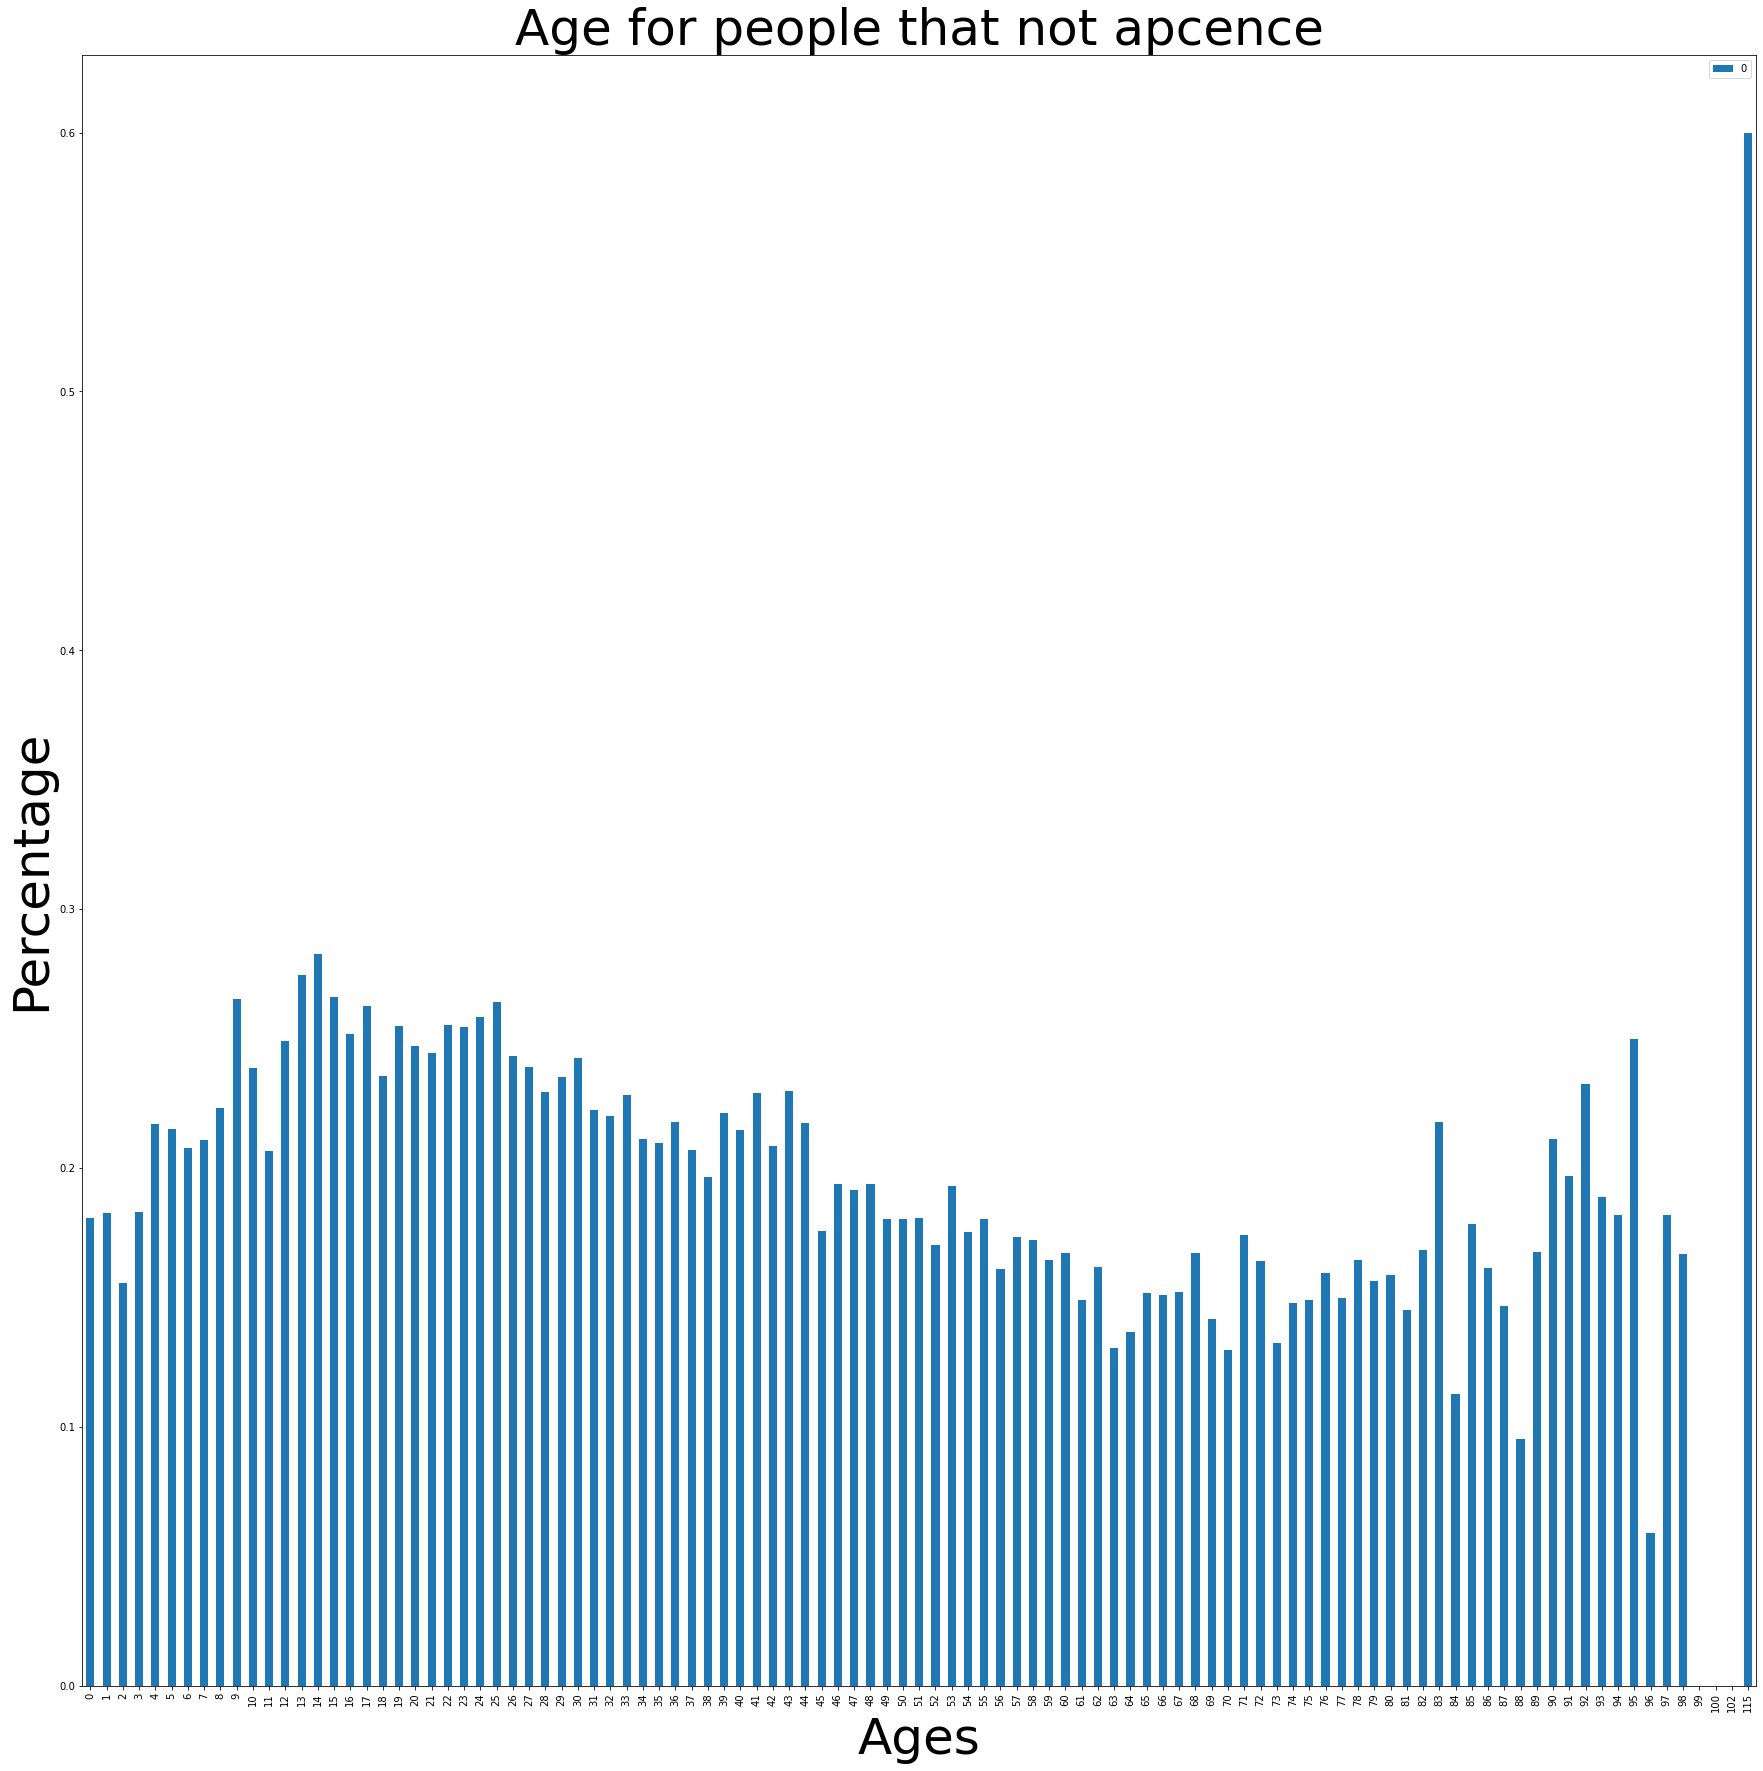

In [117]:
# sort records and convert it to a percentage to compare with different ages
agesPercentages = []
sortedAges = dict(sorted(ages.items()))
for x in sortedAges.items():
    agesPercentages.append((x[1][1] / (x[1][0] + x[1][1])))
x = pd.DataFrame(agesPercentages, index=sortedAges)
x.plot(kind="bar", figsize=(30,30))
plt.title('Age for people that not apcence', fontsize=50)
plt.xlabel('Ages', fontsize=50)
plt.ylabel('Percentage', fontsize=50);

In [118]:
# how many people have 115 years
df.groupby('Age').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
0,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539
1,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
2,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
3,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
4,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6,6,6,6,6,6,6,6,6,6,6,6,6
99,1,1,1,1,1,1,1,1,1,1,1,1,1
100,4,4,4,4,4,4,4,4,4,4,4,4,4


# Answer

##### We see That ages between 11 to 30 is the most people that not apcence after they Scheduled to a visit 
##### Yes people which has 115 years are have more percentage but when we show number of this people they are just 5 so they are few people

---

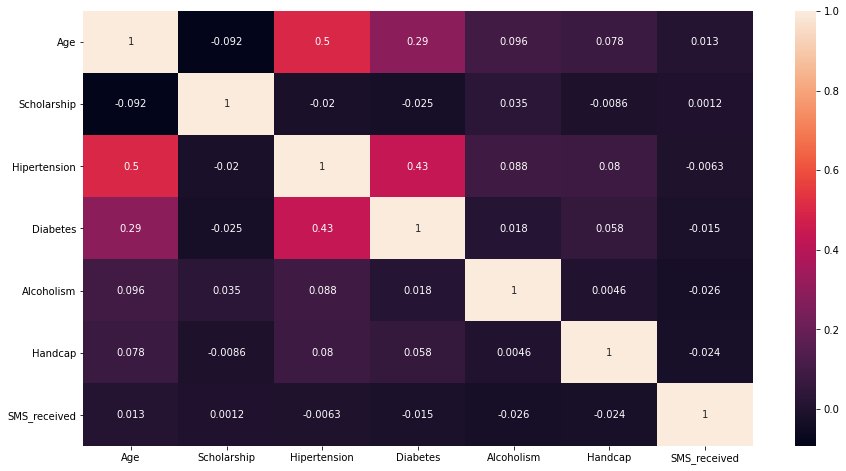

In [119]:
# Data frame correlation between variables 
plt.figure(figsize = (15,8))
sn.heatmap(df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']].corr(), annot=True);


# Conclusions


### Results

- We found that Gender not affect on Show up of Patients the percentage are same approxmitly

- We found that people has scholarship are show up more in percentage than not have but number of people which not have
scholarship are very huge compared by people which have scholarship so we should work more on people not have scholarship

- We found that people which we send to them SMS respose with 27.5% compared by 16.7% for people not recevied any SMS
So we can see a good relation between show up and SMS's so we should send more SMS's to all our patients to increase show up rate

- We found That ages between 11 to 30 is the most people that not apcence after they Scheduled to a visit
Yes people which has 115 years are have more percentage but when we show number of this people they are just 5 so they are few people and this record will be as outliner

### Limitations

- Database have proplem in ages there is alot of records have 0 age
- Database not say to us how far is the location of patients to hospital that may be affect also analysis
- We found an age with -1 that also say to us data not done well 
